# Introduction to Neural netwwork classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A few types of classification:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1k examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Visualize data
import pandas as pd

circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


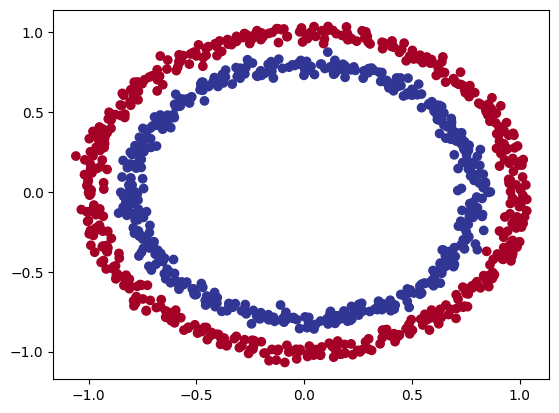

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View an example of features and labels
X[1], y[1]

(array([-0.75615888,  0.15325888]), 1)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [8]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 9ms/step - loss: 5.2801 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 4.4344 - accuracy: 0.4750
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 3.6195 - accuracy: 0.5140
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 1.6747 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.7334 - accuracy: 0.4950


In [9]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=20, verbose=0)

In [10]:
# Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932805180549622, 0.5]

In [11]:
# Let's improve the model

# Set seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [12]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932867169380188, 0.5]

## Improving our model

In [13]:
# Set seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [14]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939444541931152, 0.5]

Let's create a plotting fuction that:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones.

In [15]:
import numpy as np

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary of a model.
  """
  # define axis
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  # Make predicitions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decusion boundary
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


<ipython-input-15-24d35b831050>:28: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)


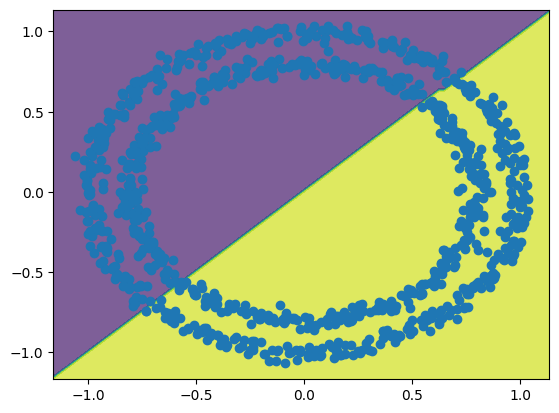

In [16]:
# Check out the predictions
plot_decision_boundary(model=model_3,
                       x=X,
                       y=y)

In [17]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

x_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [18]:
# Split our regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -4075.4451 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -7145.0532 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: -7153.6885 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

In [19]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit
model_3.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 313.0209 - mae: 313.0209
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 184.4528 - mae: 184.4528
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 68.4772 - mae: 68.4772
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.4844 - mae: 72.4844
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 79.3578 - mae: 79.3578
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.4152 - mae: 51.4152
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 47.8344 - mae: 47.8344
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.5460 - mae: 43.5460
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.0608 - mae: 46.0608
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6384 - mae: 43.6384
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step


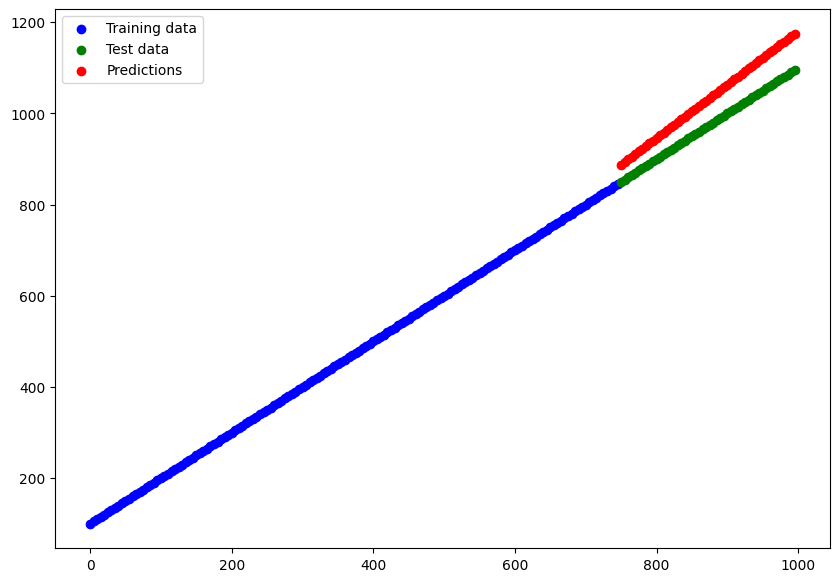

In [20]:
# Make preds
y_reg_preds = model_3.predict(x_reg_test)

# plot preds vs test data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [21]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9907 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9692 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9544 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9441 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9486 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9347 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9244 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9130 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9095 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9086 - accuracy: 0.4820
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


<ipython-input-15-24d35b831050>:28: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)


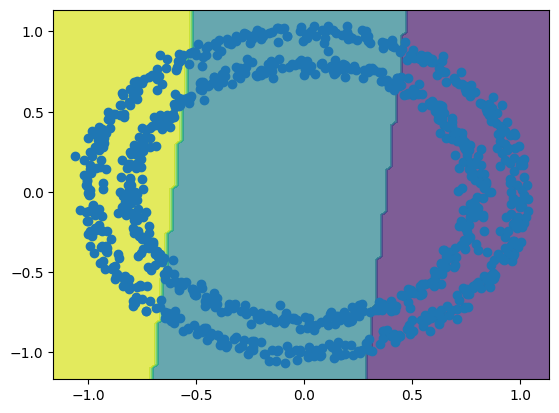

In [22]:
plot_decision_boundary(model=model_4,
                       x=X,
                       y=y)

In [23]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3064 - accuracy: 0.1540
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2056 - accuracy: 0.1540
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1358 - accuracy: 0.1570
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0704 - accuracy: 0.1580
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0011 - accuracy: 0.1590
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9260 - accuracy: 0.1580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8530 - accuracy: 0.1590
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7431 - accuracy: 0.1590
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5915 - accuracy: 0.1590
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5154 - accuracy: 0.1600
Epoch 11/

In [24]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [25]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-15-24d35b831050>:28: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)


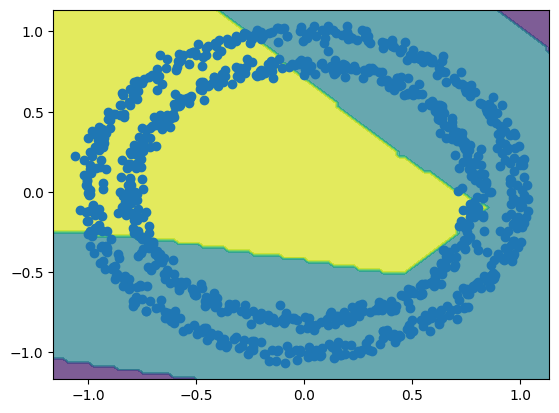

In [26]:
# Visualize preds
plot_decision_boundary(model=model_6,
                       x=X,
                       y=y)

In [27]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7535 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.4510
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.4470
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.4520
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.4450
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.4420
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4300
Epoch 11/

In [28]:
# Evaluate
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6800


[0.5902143716812134, 0.6800000071525574]

313/313 [==============================] - 0s 1ms/step
doing binary classification


<ipython-input-15-24d35b831050>:28: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)


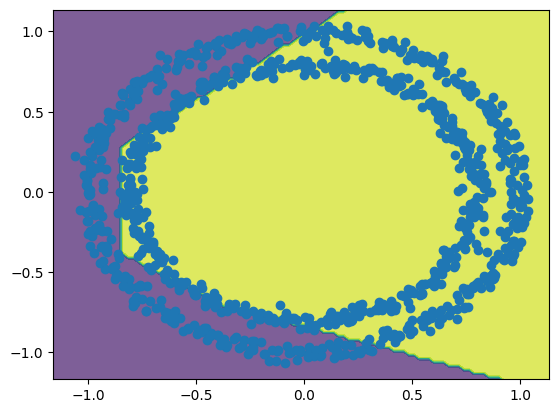

In [29]:
# Visualize
plot_decision_boundary(model_7, X, y)

In [30]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

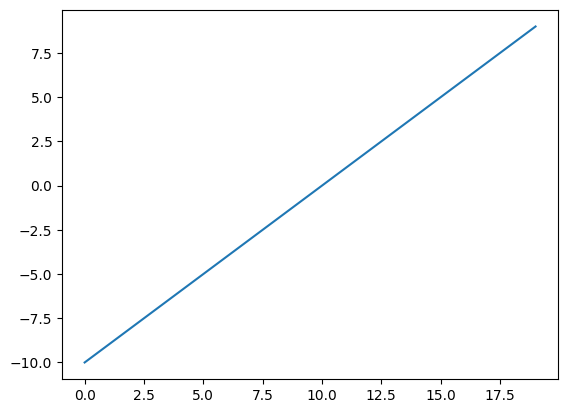

In [31]:
# Visualize our toy tensor
plt.plot(A)

In [32]:
# REpliacte sigmoid ->sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

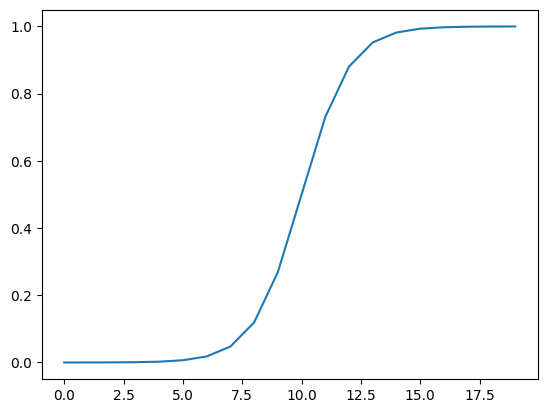

In [33]:
plt.plot(sigmoid(A))

In [34]:
def relu(x):
  return tf.maximum(0, x)

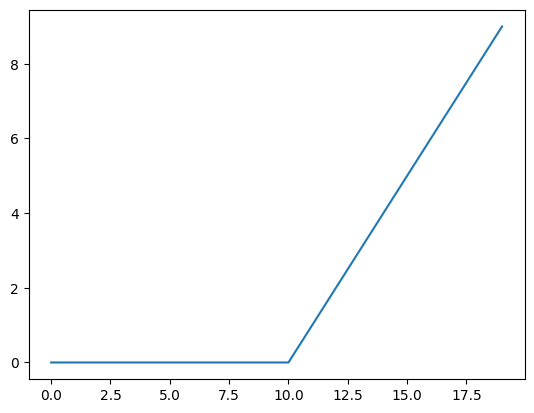

In [35]:
plt.plot(relu(A))

## Evaluating and improving our classification

In [36]:
# Split data
x_train, y_train = X[:800], y[:800]
x_test, y_test = X[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [37]:
# Let's create another model

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5175
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5200
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5387
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5638
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5400
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6150
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6062
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7713
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7675
Epoch 11/25
25/25 [

In [38]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9200


[0.18900687992572784, 0.9200000166893005]

313/313 [==============================] - 0s 1ms/step
doing binary classification
 83/313 [======>.......................] - ETA: 0s

<ipython-input-15-24d35b831050>:28: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)


313/313 [==============================] - 0s 1ms/step
doing binary classification


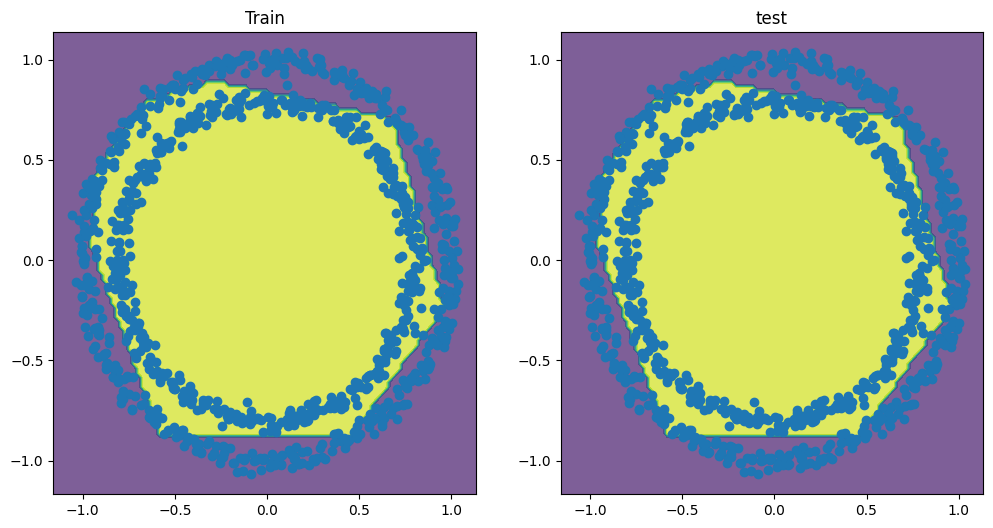

In [39]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_8, x=x_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model=model_8, x=x_test, y=y_test)

plt.show()

## Plot the loss curve

In [40]:
history.history

{'loss': [0.6929562091827393,
  0.6912592053413391,
  0.6889281272888184,
  0.6851056814193726,
  0.6802221536636353,
  0.6717161536216736,
  0.6610260605812073,
  0.648084282875061,
  0.623375654220581,
  0.5863759517669678,
  0.5458598732948303,
  0.5011136531829834,
  0.45847201347351074,
  0.41560372710227966,
  0.3834570050239563,
  0.35727497935295105,
  0.32869580388069153,
  0.3105139434337616,
  0.290320485830307,
  0.2758784294128418,
  0.25600096583366394,
  0.23973964154720306,
  0.22535385191440582,
  0.2248499095439911,
  0.22563700377941132],
 'accuracy': [0.4987500011920929,
  0.5174999833106995,
  0.5199999809265137,
  0.5387499928474426,
  0.5637500286102295,
  0.5400000214576721,
  0.6150000095367432,
  0.606249988079071,
  0.7712500095367432,
  0.7674999833106995,
  0.7950000166893005,
  0.8187500238418579,
  0.8374999761581421,
  0.8587499856948853,
  0.8612499833106995,
  0.8650000095367432,
  0.8824999928474426,
  0.8812500238418579,
  0.8787500262260437,
  0.888

In [41]:
# Convert history to a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692956,0.49875
1,0.691259,0.51750
2,0.688928,0.52000
3,0.685106,0.53875
4,0.680222,0.56375
5,0.671716,0.54000
6,0.661026,0.61500
7,0.648084,0.60625
8,0.623376,0.77125
9,0.586376,0.76750


Text(0.5, 1.0, 'Model_8 loss curves')

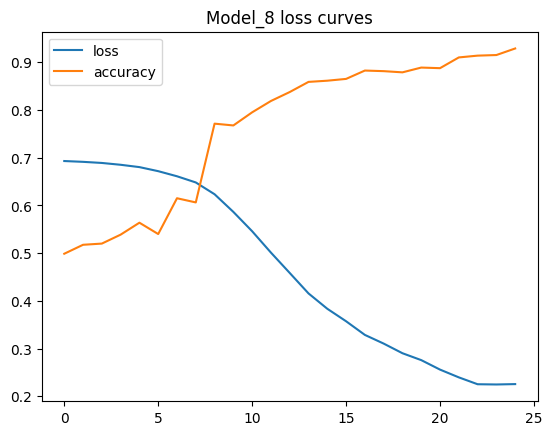

In [42]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learining rate callback - you can think of a callback as an extra piece of funtionality, you can add to your model while it is training
* Another model
* A modified loss curve plot

In [43]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X, y, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7210 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.5010 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7189 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.4980 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.4970 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4980 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.4960 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss:

<Axes: >

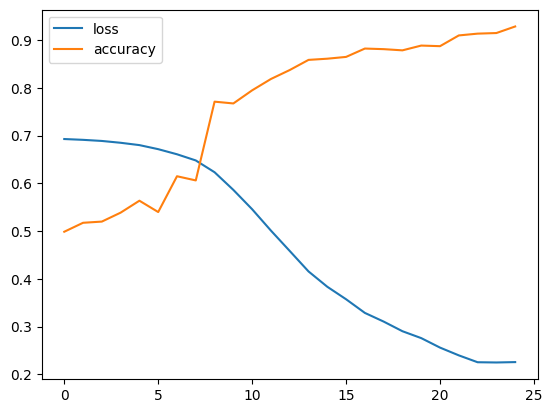

In [44]:
# Check the history
pd.DataFrame(history.history).plot()

In [45]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

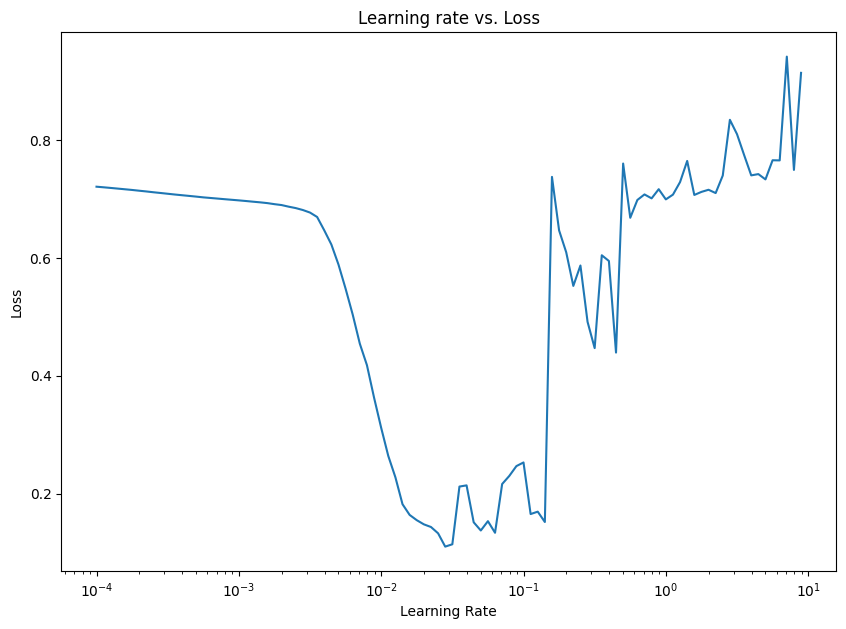

In [46]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

In [47]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

history_10 = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5263
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5562
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5775
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6438
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7000
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7875
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.9225
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.9550
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9837
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [48]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9700


[0.055774200707674026, 0.9700000286102295]

313/313 [==============================] - 0s 1ms/step
doing binary classification
 87/313 [=======>......................] - ETA: 0s

<ipython-input-15-24d35b831050>:28: UserWarning: The following kwargs were not used by contour: 'cmpa'
  plt.contourf(xx, yy, y_pred, cmpa=plt.cm.RdYlBu, alpha=0.7)


313/313 [==============================] - 0s 1ms/step
doing binary classification


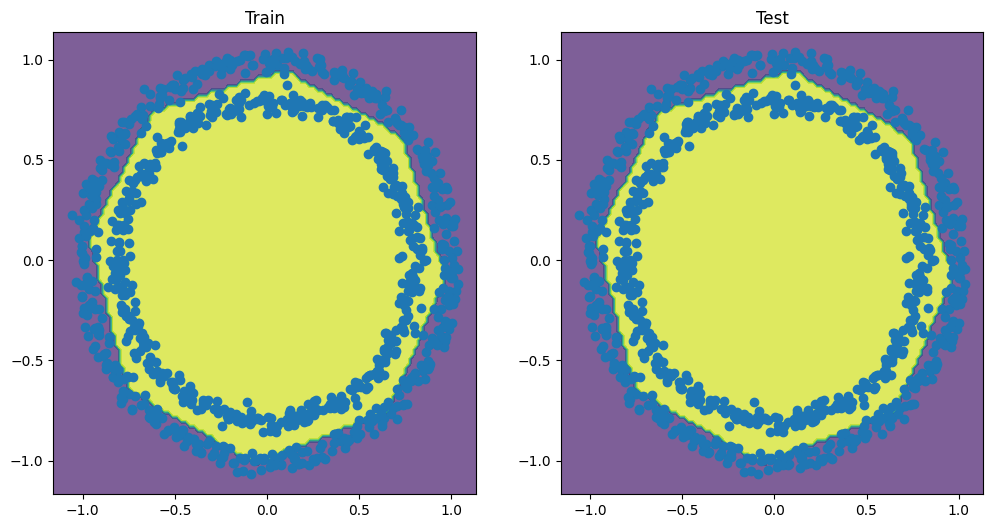

In [49]:
#Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, x=x_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, x=x_test, y=y_test)

plt.show()

## More classification evaluation methods

Classification evaluation methods:
* Accuracy
* Precision -> less false positives
* Recall -> less false negatives
* F1-score -> Precision + Recall
* Confusion matrix

In [50]:
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9700
Loss: 0.055774200707674026
Accuracy: 97.00%


### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

#Convert preds propabilities to binary
y_preds_bin = tf.round(y_preds)


7/7 [==============================] - 0s 3ms/step


In [52]:
confusion_matrix(y_test, y_preds_bin)

array([[95,  6],
       [ 0, 99]])

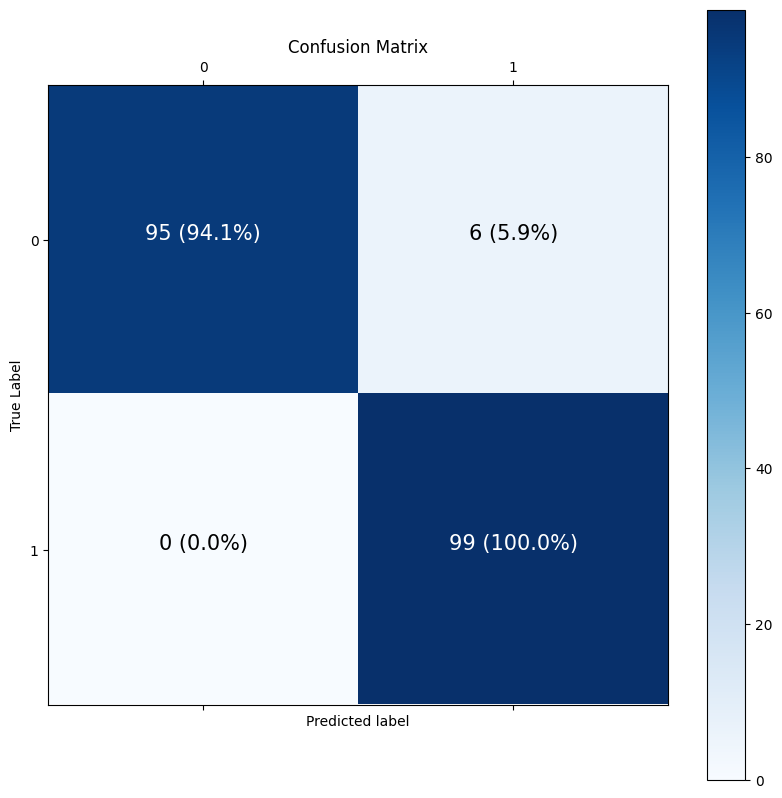

In [53]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds_bin)
cm_norm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis] # normalize the confusion matrix
n_classes = cm.shape[0]

# Lets prettify
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the treshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size = 15)